# Import the data

In [3]:
import pandas as pd
import numpy as np

In [4]:
houses = pd.read_csv("olx-data.csv")

# Treat the data

In [5]:
houses.replace("--", np.nan, inplace=True)
houses.drop(columns=["link", "hora", "dia", "iptu", "condopreco", "corretor", "cep"], inplace=True)
houses.drop(houses[houses.preco < 50000].index, inplace=True)
houses.drop(houses[houses.area > 100].index, inplace=True)

In [6]:
def treat_values(column):
    # Get the median value and replace all the NaN's with it (it's the median, not the mean - we can use with strings!)
    houses[column].fillna(houses[column].median(), inplace=True)
    houses[column] = houses[column].astype("int64")

houses["banheiros"].replace("5 ou mais", "5", inplace=True)
houses["vagas"].replace("5 ou mais", "5", inplace=True)
treat_values("banheiros")
treat_values("vagas")
treat_values("quartos")

In [9]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 958
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            944 non-null    int64 
 1   categoria     944 non-null    object
 2   municipio     944 non-null    object
 3   ano           944 non-null    int64 
 4   mes           944 non-null    int64 
 5   preco         944 non-null    int64 
 6   area          944 non-null    int64 
 7   quartos       944 non-null    int64 
 8   banheiros     944 non-null    int64 
 9   vagas         944 non-null    int64 
 10  condofechado  944 non-null    object
 11  politica      944 non-null    object
dtypes: int64(8), object(4)
memory usage: 95.9+ KB


In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

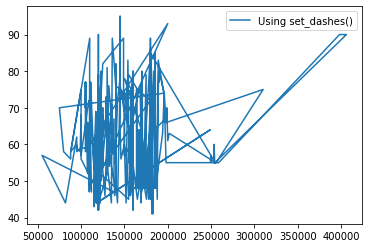

In [15]:
x = houses["preco"]
y = houses["area"]

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Using set_dashes()')
#line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
#line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

ax.legend()
plt.show()